<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:xlabel='ConvertedComp'>

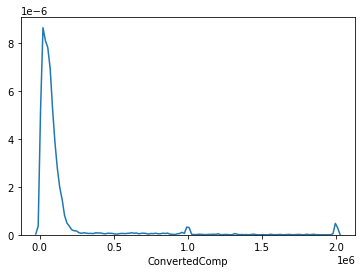

In [3]:
# your code goes here
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.distplot(df['ConvertedComp'],hist=False)

Plot the histogram for the column `ConvertedComp`.


Text(0, 0.5, 'Salaries')

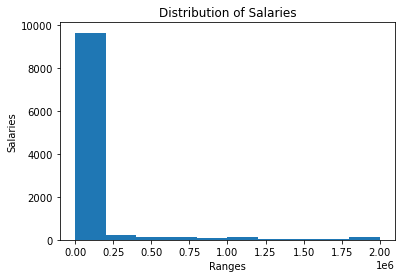

In [4]:
# your code goes here
#count,bin_edges=np.histogram(df['ConvertedComp'])
df['ConvertedComp'].plot.hist()
plt.title('Distribution of Salaries')
plt.xlabel('Ranges')
plt.ylabel('Salaries')

What is the median of the column `ConvertedComp`?


In [5]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [6]:
# your code goes here
a=df['Gender'].value_counts()
print(a['Man'])

10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [7]:
# your code goes here
df1=df[df['Gender']=='Woman']
print('With all gender ConvertedComp median:', df['ConvertedComp'].median(),'Only Women ConvertedComp median:',df1['ConvertedComp'].median())

With all gender ConvertedComp median: 57745.0 Only Women ConvertedComp median: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [8]:
# your code goes here
min=df['Age'].min()
q1=df['Age'].quantile(0.25)
median=df['Age'].median()
q2=df['Age'].quantile(0.75)
max=df['Age'].max()
five_number_summary="('min'={0},'q1'={1},'median'={2},'q2'={3},'max'={4})".format(min,q1,median,q2,max)
print(five_number_summary)

('min'=16.0,'q1'=25.0,'median'=29.0,'q2'=35.0,'max'=99.0)


Plot a histogram of the column `Age`.


<AxesSubplot:ylabel='Frequency'>

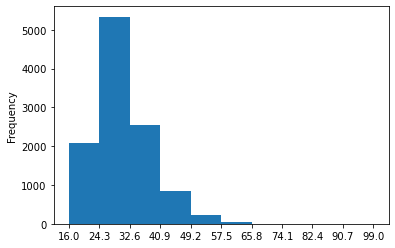

In [9]:
# your code goes here
count,ticks=np.histogram(df['Age'].dropna())
df['Age'].plot.hist(xticks=ticks)

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:>

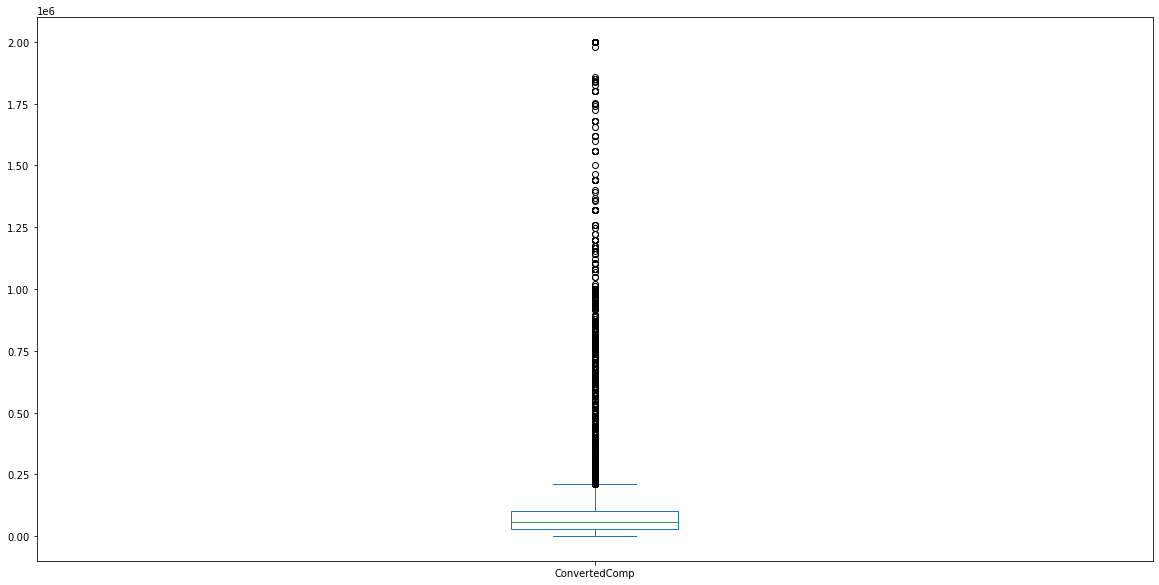

In [10]:
# your code goes here
df['ConvertedComp'].plot.box(figsize=(20,10))

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [11]:
# your code goes here
q1=df['ConvertedComp'].quantile(0.25)
q2=df['ConvertedComp'].quantile(0.75)
INR=q2-q1
print(INR)

73132.0


Find out the upper and lower bounds.


In [12]:
# your code goes here
print('Lower Bound:',df['ConvertedComp'].quantile(0),"",'Upper Bound:',df['ConvertedComp'].quantile(1))

Lower Bound: 0.0  Upper Bound: 2000000.0


Identify how many outliers are there in the `ConvertedComp` column.


In [19]:
# your code goes here
outliers=((df['ConvertedComp']<q1-1.5*INR)|(df['ConvertedComp']>q2+1.5*INR)).sum()
print((outliers))

879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [37]:
# your code goes here
mask = (df['ConvertedComp'] < (q1 - 1.5 * INR)) | (df['ConvertedComp'] > (q2 + 1.5 * INR))
df[mask] = np.nan
print('Median after removing outlier',df['ConvertedComp'].median(),'mean after removing outlier',df['ConvertedComp'].mean())

Median after removing outlier 52704.0 mean after removing outlier 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [15]:
# your code goes here
series_corr=df.corr().unstack().sort_values(ascending=False)
correlation=pd.DataFrame(series_corr).reset_index()
correlation.columns=['Col1','Col2','corr']
correlation.query("Col1=='Age'&Col2!='Age'").reset_index().iloc[:,1:]


,Col1,Col2,corr
0,Age,ConvertedComp,0.105386
1,Age,WorkWeekHrs,0.036518
2,Age,CompTotal,0.006970
3,Age,Respondent,0.004041
4,Age,CodeRevHrs,-0.020469


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
